<a href="https://colab.research.google.com/github/mahshadmoradi/Machine-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = '400109373'
first_name = 'Mahshad'
last_name = 'Moradi'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [1]:
# TODO: Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [2]:
# TODO: Write your code here
data = pd.read_csv('spotify.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
# Retain only relevant features
relevant_features = [
    'track_name', 'track_popularity', 'danceability', 'energy', 'key',
    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms'
]

data_relevant = data[relevant_features]

# Display the first few rows of the filtered dataframe
data_relevant.head()

,track_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

- Importance of Using a Standard Scaler

**Equal Contribution of Features:**
Standard scaling ensures that all features contribute equally to the distance calculations in clustering algorithms. Without scaling, features with larger ranges can dominate the clustering process, leading to biased results.

**Improved Algorithm Performance:**
Algorithms like K-means rely on Euclidean distance, which can be skewed by differing feature scales. Scaling improves the performance and convergence speed of these algorithms.

- Potential Complications Without Scaling

**Biased Clustering:**
Features with larger numerical ranges can disproportionately influence the distance calculations, causing the clustering to be driven by these features rather than a balanced contribution from all features.

**Inefficient Convergence:**
The clustering algorithm may take longer to converge or might converge to suboptimal clusters due to the imbalance in feature scales, leading to poor clustering performance.

In [4]:
# TODO: Write your code here

# Standard Scaler Implementation from Scratch
class StandardScalerr:
    def fit(self, data):
        self.mean_ = data.mean()
        self.std_ = data.std()

    def transform(self, data):
        return (data - self.mean_) / self.std_

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

numerical_features = [
    'track_popularity', 'danceability', 'energy', 'key',
    'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]

scaler = StandardScalerr()
data_scaled = scaler.fit_transform(data_relevant[numerical_features])

# Converting the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_features)
data_scaled_df['track_name'] = data_relevant['track_name']

# Displaying the scaled data
data_scaled_df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_name
0,0.941517,0.642039,1.201596,0.173197,1.367103,0.876164,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926,-0.518866,I Don't Care (with Justin Bieber) - Loud Luxur...
1,0.981542,0.490404,0.643307,1.557603,0.585758,0.876164,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186,-1.056252,Memories - Dillon Francis Remix
2,1.101619,0.138887,1.284510,-1.211209,1.100073,-1.141305,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225,-0.822004,All the Time - Don Diablo Remix
3,0.701364,0.435264,1.278982,0.450078,0.984294,0.876164,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953,-0.947735,Call You Mine - Keanu Silva Remix
4,1.061593,-0.033425,0.742804,-1.211209,0.685141,0.876164,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035,-0.614163,Someone You Loved - Future Humans Remix


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

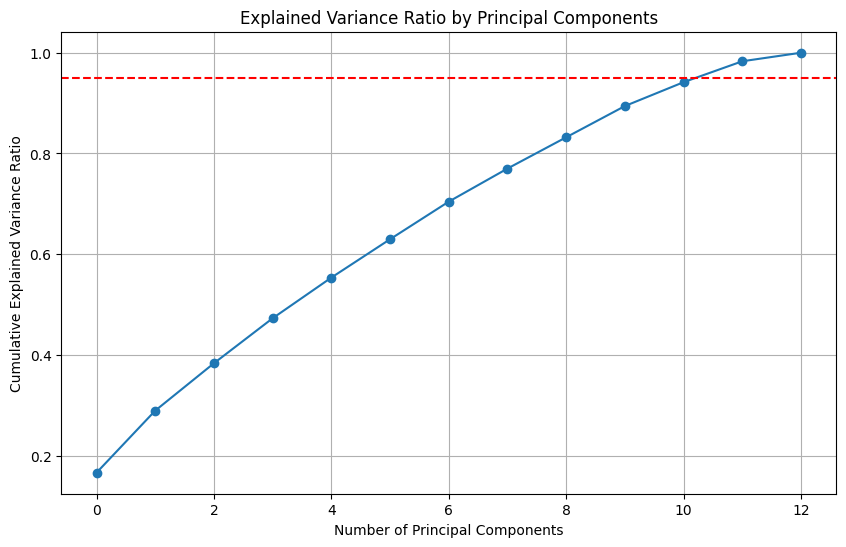

12

In [5]:
# TODO: Write your code here

features = data_scaled_df.drop(columns=['track_name'])

pca = PCA()
pca.fit(features)

# the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Determine the number of components to retain (explaining 95% variance)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
num_components

In [6]:
# Applying PCA with the determined number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(features)

# Convert the principal components to a DataFrame for easier handling
principal_components_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(num_components)])
principal_components_df['track_name'] = data_relevant['track_name']

# Display the first few rows of the principal components
principal_components_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,track_name
0,-1.452804,-0.905289,-0.958125,-0.491543,-1.267293,-0.319541,0.017877,0.154395,0.308447,0.690492,0.232996,-0.507997,I Don't Care (with Justin Bieber) - Loud Luxur...
1,-1.000859,-1.182783,-0.266586,0.285337,-0.742398,0.899133,-1.222450,1.674967,0.524508,0.854458,-0.495209,0.101332,Memories - Dillon Francis Remix
2,-1.540634,-1.050459,-0.864663,0.102099,-0.972972,-0.575975,-0.197542,-0.666344,-0.323331,-1.411980,0.390737,0.278814,All the Time - Don Diablo Remix
3,-1.527536,-0.324848,-0.964577,0.320976,-0.593879,-0.445190,-0.673283,0.017294,0.477853,1.084612,-0.423429,-0.508815,Call You Mine - Keanu Silva Remix
4,-0.981714,-0.759498,-1.656056,-1.203668,-0.796384,-0.200964,0.157608,0.225824,-0.062136,-0.438392,0.162602,0.463785,Someone You Loved - Future Humans Remix


# Clustering

Implement K-means for clustering from scratch.

In [7]:
# TODO: Write your code here
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        # Randomly initialize the centroids
        np.random.seed(42)  # For reproducibility
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_indices]

        for _ in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)

            # Calculate new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return np.argmin(distances, axis=0)

    def predict(self, X):
        return self._assign_clusters(X)

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

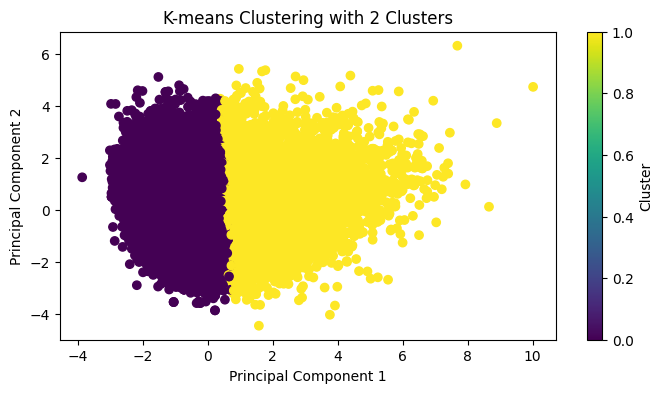

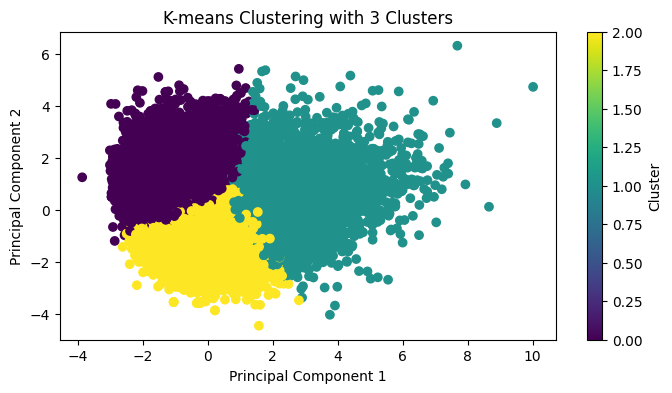

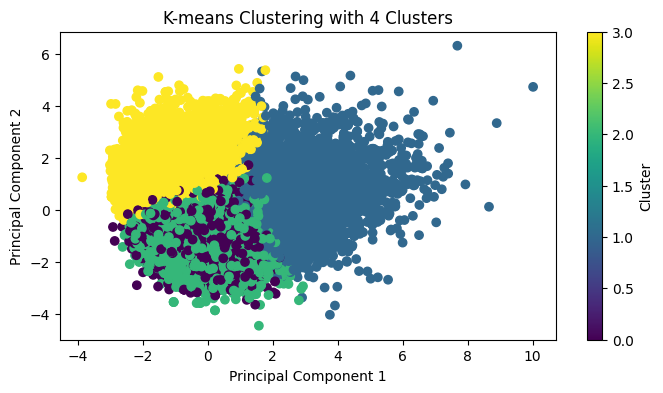

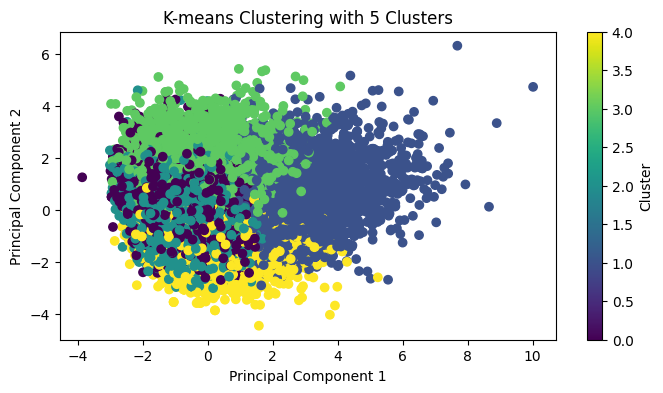

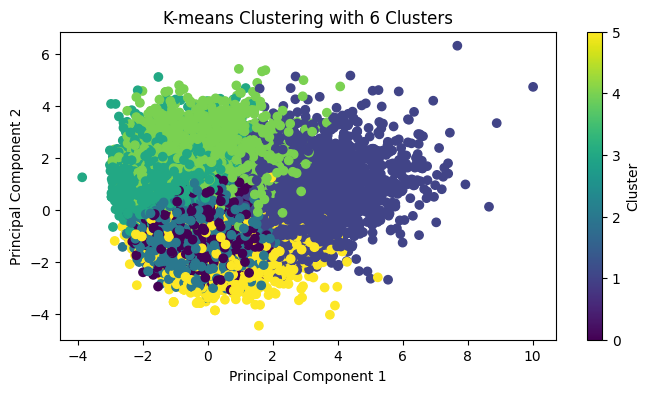

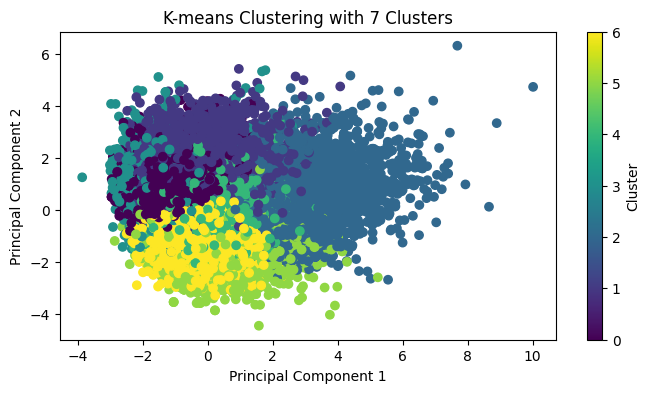

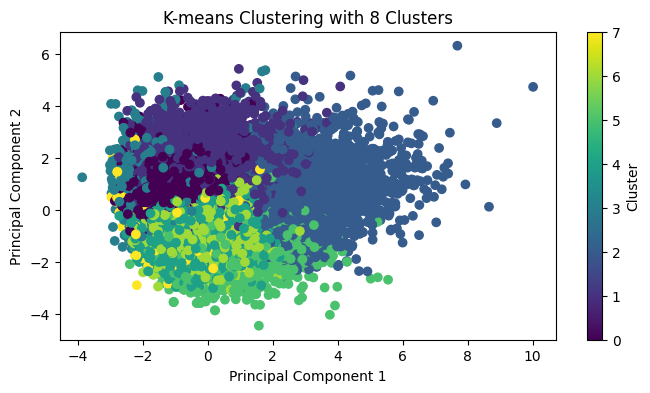

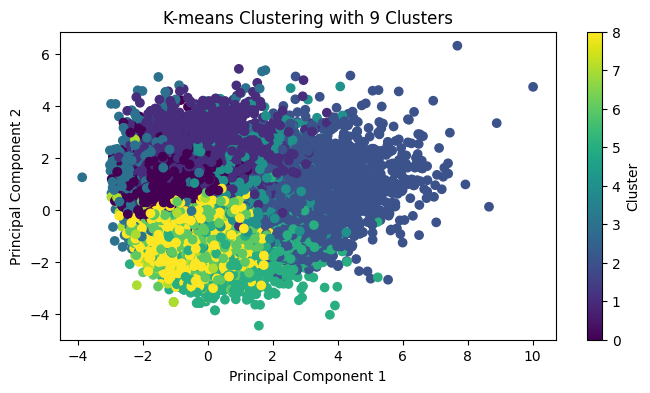

In [8]:
# TODO: Write your code here

# Execute K-means for different number of clusters and plot the results
for n_clusters in range(2, 10):
    kmeans = KMeansScratch(n_clusters=n_clusters)
    kmeans.fit(principal_components_df.drop(columns=['track_name']).values)
    labels = kmeans.predict(principal_components_df.drop(columns=['track_name']).values)

    # Plotting the clusters
    plt.figure(figsize=(8, 4))
    plt.scatter(principal_components_df['PC1'], principal_components_df['PC2'], c=labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.colorbar(label='Cluster')
    plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

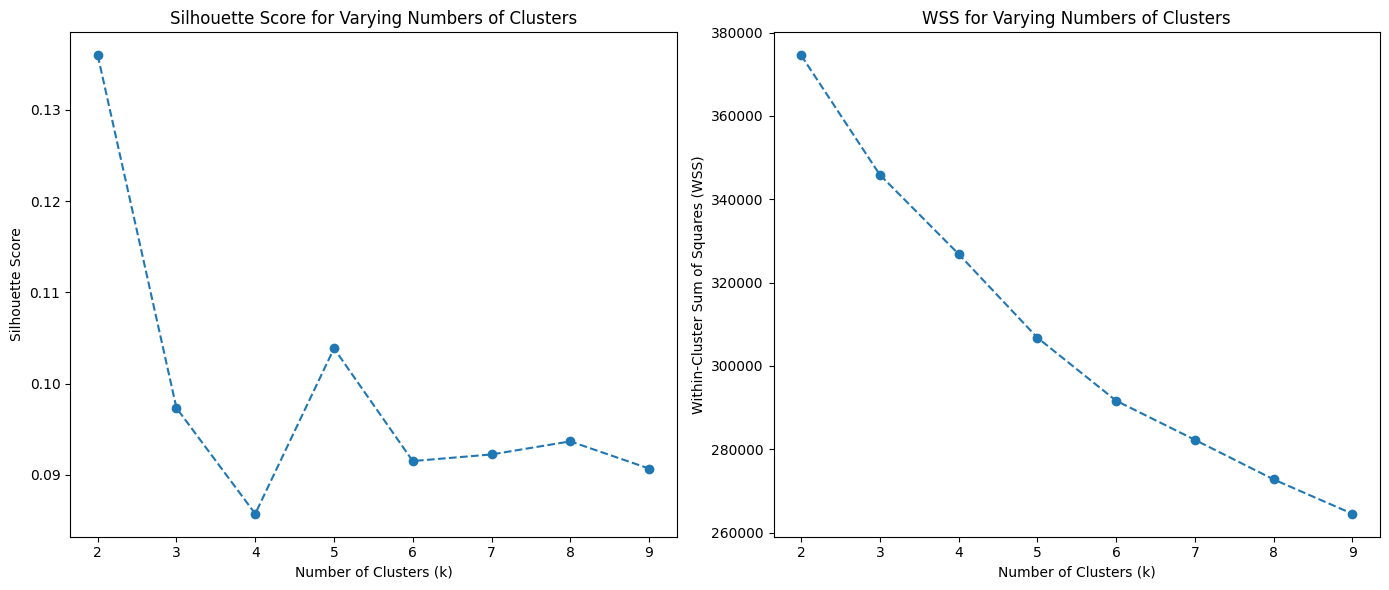

In [9]:
# TODO: Write your code here

def calculate_wss(data, kmeans):
    wss = 0
    for i in range(kmeans.n_clusters):
        cluster_points = data[kmeans.labels == i]
        centroid = kmeans.centroids[i]
        wss += np.sum((cluster_points - centroid) ** 2)
    return wss

# Calculate Silhouette scores and WSS for different numbers of clusters
silhouette_scores = []
wss_values = []
X = principal_components_df.drop(columns=['track_name']).values

# Range of clusters to evaluate
cluster_range = range(2, 10)

# Loop through the range of clusters
for n_clusters in cluster_range:
    kmeans = KMeansScratch(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.predict(X)

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate WSS
    wss = calculate_wss(X, kmeans)
    wss_values.append(wss)

# Plotting the Silhouette score and WSS
fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))

# Silhouette Score Plot
ax1[0].plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
ax1[0].set_xlabel('Number of Clusters (k)')
ax1[0].set_ylabel('Silhouette Score')
ax1[0].set_title('Silhouette Score for Varying Numbers of Clusters')

# WSS Plot
ax1[1].plot(cluster_range, wss_values, marker='o', linestyle='--')
ax1[1].set_xlabel('Number of Clusters (k)')
ax1[1].set_ylabel('Within-Cluster Sum of Squares (WSS)')
ax1[1].set_title('WSS for Varying Numbers of Clusters')

plt.tight_layout()
plt.show()

**Optimal Number of Clusters:  k = 2**

**Silhouette Score:**
- Peaks at k = 2 with the highest value (~0.135).
- Indicates well-defined clusters with maximum separation.

**WSS Score:**
- Shows a steep drop from k = 2 to k = 3.
- Suggests diminishing returns for clusters beyond k = 3.


Therefore the optimal number of clusters is k = 2, as it provides the highest clustering quality with well-defined clusters.

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [11]:
# TODO: Write your code here

kmeans = KMeansScratch(n_clusters=2)
kmeans.fit(principal_components_df.drop(columns=['track_name']).values)
labels = kmeans.predict(principal_components_df.drop(columns=['track_name']).values)

# Adding the cluster labels to the DataFrame
principal_components_df['cluster'] = labels

# Randomly select two songs from each cluster
sample_songs = principal_components_df.groupby('cluster').apply(lambda x: x.sample(2)).reset_index(drop=True)

# Calculate the Euclidean distance between the selected songs
for cluster in sample_songs['cluster'].unique():
    songs = sample_songs[sample_songs['cluster'] == cluster]
    if len(songs) == 2:
        song1 = songs.iloc[0]
        song2 = songs.iloc[1]
        distance = np.linalg.norm(song1.drop(['track_name', 'cluster']) - song2.drop(['track_name', 'cluster']))
        print(f'Cluster {cluster}: Distance between selected songs is {distance}')

sample_songs

Cluster 0: Distance between selected songs is 3.255528134127854
Cluster 1: Distance between selected songs is 6.246740821028484


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,track_name,cluster
0,0.037187,-0.453371,0.488753,0.214545,-0.844421,0.545684,0.374636,-0.059590,-0.039678,-1.001615,-0.631971,0.825709,Swingin Party - 2008 Remaster,0
1,-0.384686,0.070736,1.017608,0.546358,1.857563,0.189200,0.857798,-0.441445,-0.011588,-1.108881,-0.892189,-0.541385,Buma In Mijn Zak,0
2,2.311594,2.329791,-1.439999,0.514508,1.734422,-0.891902,2.284084,-1.030340,0.943162,0.105261,0.481817,0.046269,"Worldwide (feat. Curtis Heron, Night Lovell, F...",1
3,1.041900,0.033754,-0.063333,-1.295318,-0.073462,0.429744,0.155014,1.033210,-2.415225,0.662926,0.247133,1.277523,Laughter In The Rain,1


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

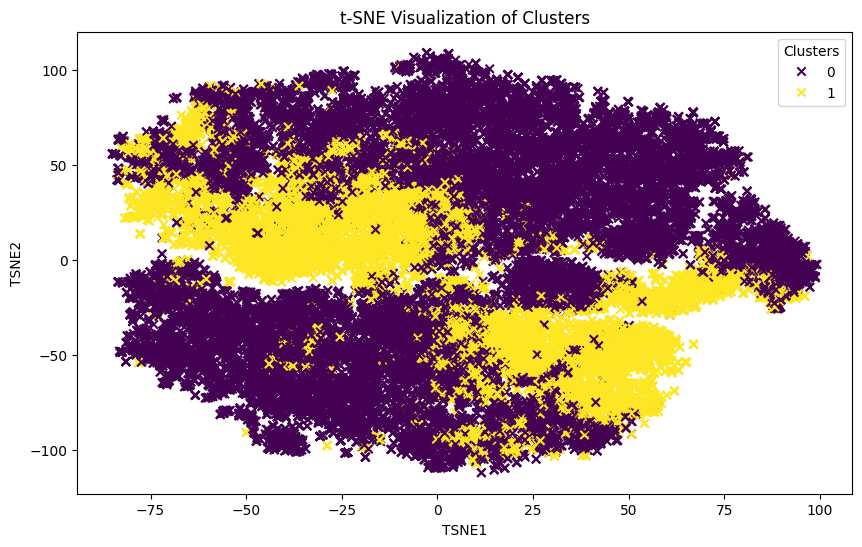

In [12]:
# TODO: Write your code here

# t-SNE to reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(principal_components_df.drop(columns=['track_name', 'cluster']))

# DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = principal_components_df['cluster']

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], marker='x' ,c=tsne_df['cluster'], cmap='viridis')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE Visualization of Clusters')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(False)  # Remove grid for cleaner visualization
plt.show()